In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn import metrics


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv('day.csv')


In [100]:
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [101]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [43]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df.shape

(731, 12)

[Text(0.5, 1.0, 'Month-wise raidership distribution')]

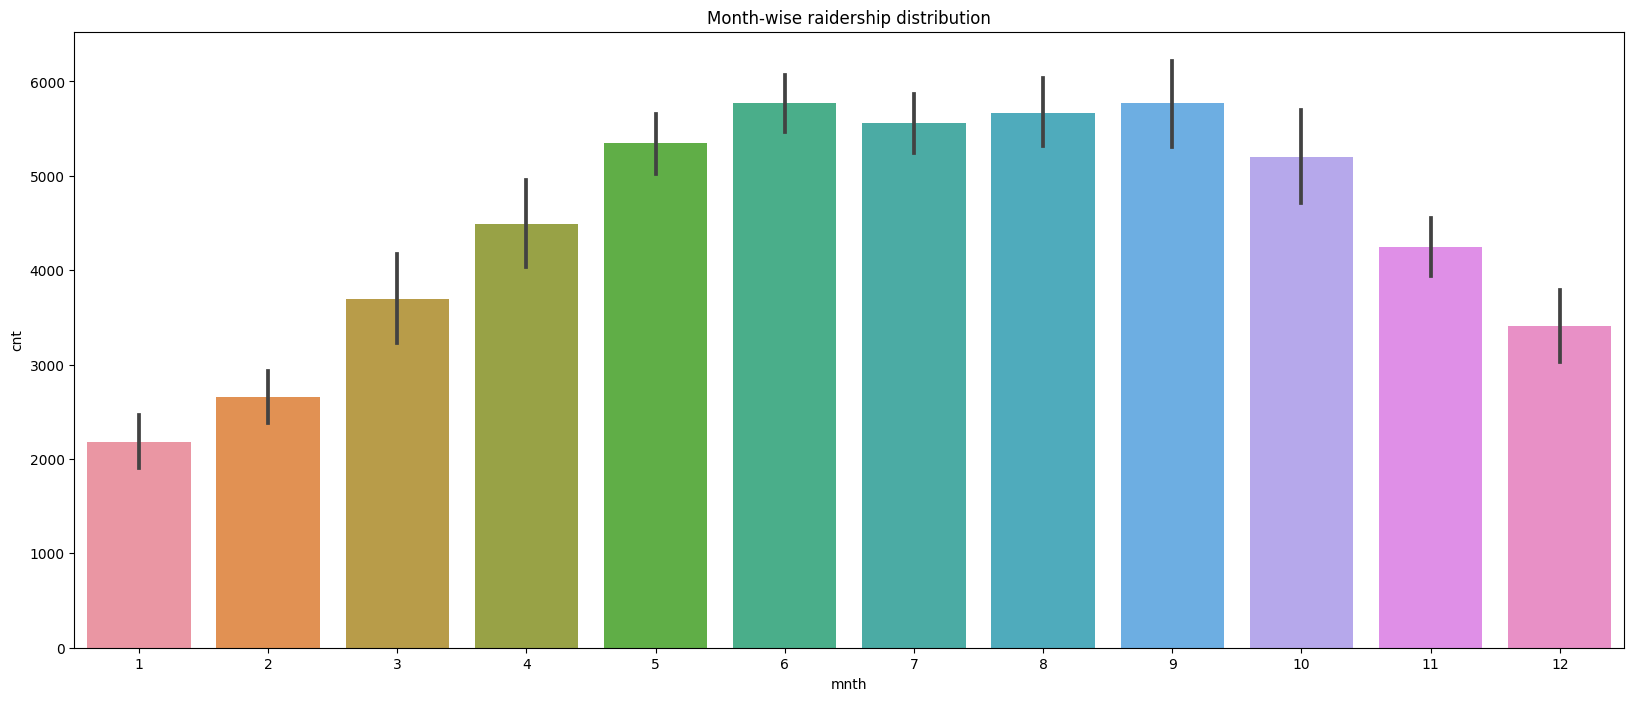

In [19]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df[['mnth','cnt']],x='mnth',y='cnt',ax=ax)
ax.set(title='Month-wise raidership distribution')

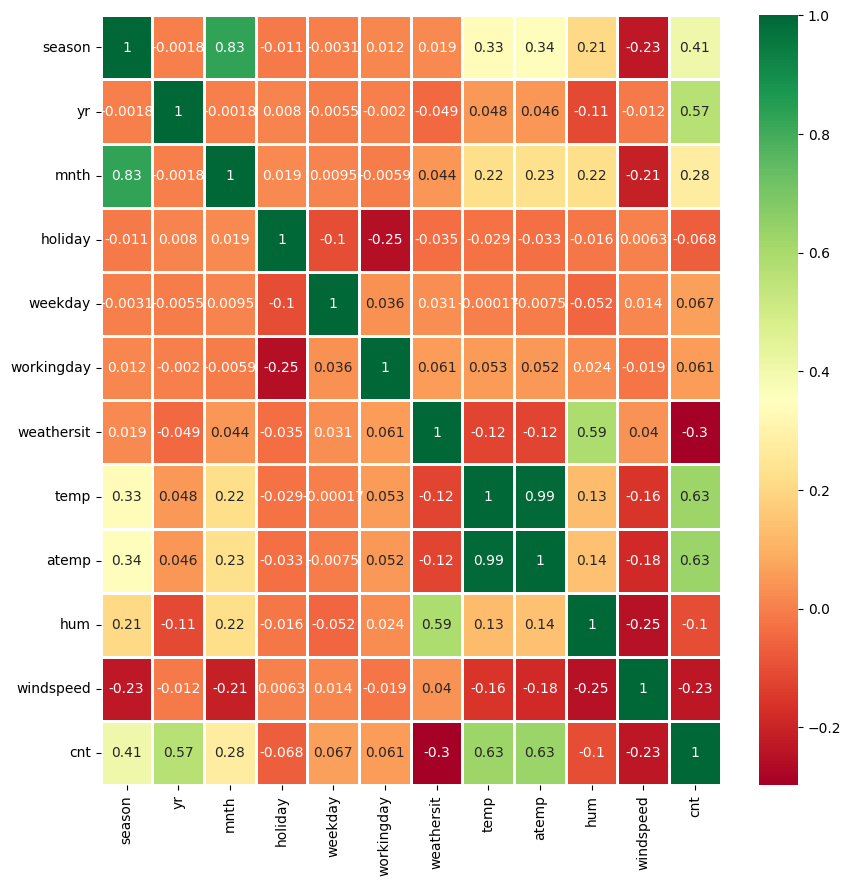

In [22]:
plt.figure(figsize = (10,10))
ax= sns.heatmap(df.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [49]:
df = df.drop(["atemp","weekday"],axis=1)

In [45]:
mask = ['season','yr','mnth','weathersit','holiday']

In [35]:
droped =['season','yr','mnth','weathersit','holiday']

In [ ]:
dum_df = pd.get_dummies(df,df[mask].astype("category"), drop_first=True)

In [36]:
df1 = pd.concat((df.drop(droped, axis=1), dum_df), axis=1)
df1.head()

,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3,holiday_1
0,0,0.344167,0.805833,0.160446,985,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.363478,0.696087,0.248539,801,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0.196364,0.437273,0.248309,1349,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.200000,0.590435,0.160296,1562,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.226957,0.436957,0.186900,1600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
x = df1.drop("cnt", axis=1)
y = df1["cnt"]

In [42]:
sclra = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
sclr = StandardScaler()
x_train = sclr.fit_transform(x_train)
x_test = sclr.transform(x_test)
x_train.shape, x_test.shape

((688, 22), (43, 22))

In [4]:

def runsplit(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(
        "MSE:", metrics.mean_squared_error(y_test, y_pred),"\n",
        "R2_SCORE:", metrics.r2_score(y_test, y_pred),"\n",
        "MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred),"\n",
        "RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)),"\n",
)        

accuracies = {}
accuracies2 = {}
        
def check(model):
    check1 = model.score(x_train, y_train)*100
    accuracies[model] = check1
    print('Training set score:', accuracies[model])
    check2 = model.score(x_test,y_test)*100
    accuracies2[model] = check2
    print('Test set score:', accuracies2[model])  


def plotp(model):
    
    y_pred = model.predict(x_test)
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    bins = None
    sns.distplot(y_pred, ax=ax, color="blue", label="predictions", bins=bins)
    sns.distplot(y_test, ax=ax, color="red", label="true", bins=bins)
    ax.legend()

In [5]:
def run(model):
    print('Split mode:')
    runsplit(model)
    print('Check for overfitting and underfitting')
    check(model)
    plotp(model)
  

Split mode:
MSE: 579561.9851666491 
 R2_SCORE: 0.8749652292244041 
 MAPE: 0.1697107565747028 
 RMSE: 761.2896854461179 

Check for overfitting and underfitting
Training set score: 84.04348261536371
Test set score: 87.4965229224404


C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, ax=ax, color="blue", label="predictions", bins=bins)
C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

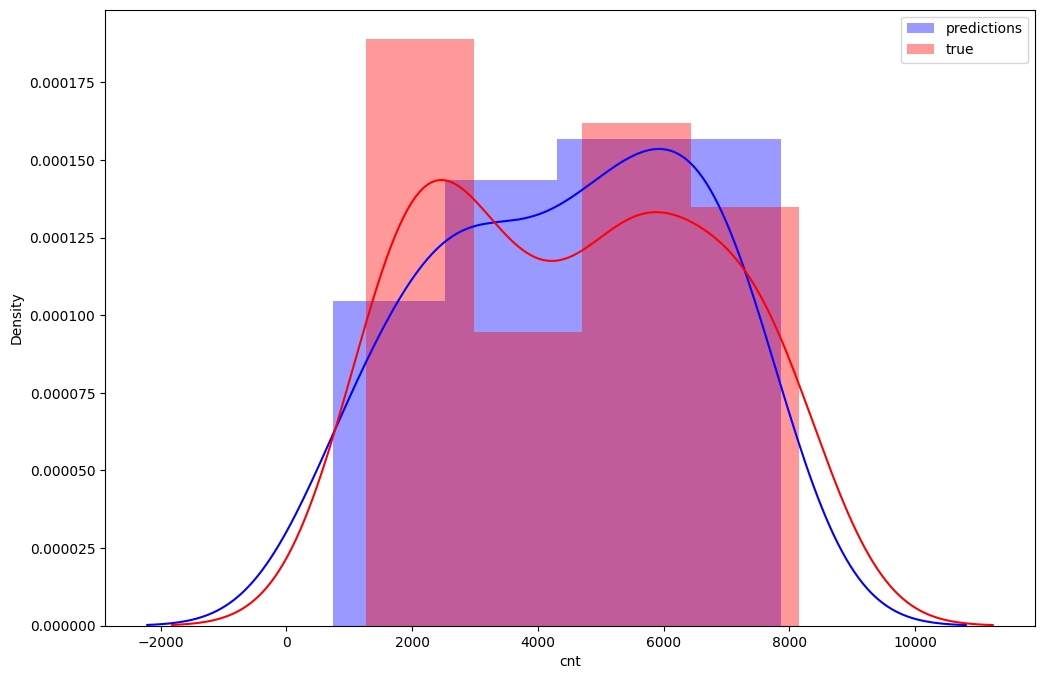

In [115]:
lr = LinearRegression()
run(lr)

In [102]:
from sklearn.ensemble import RandomForestRegressor

Split mode:
MSE: 224063.8978604651 
 R2_SCORE: 0.951660428349154 
 MAPE: 0.09970972598742578 
 RMSE: 473.35388227040573 

Check for overfitting and underfitting
Training set score: 97.9695222165164
Test set score: 95.1660428349154


C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, ax=ax, color="blue", label="predictions", bins=bins)
C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

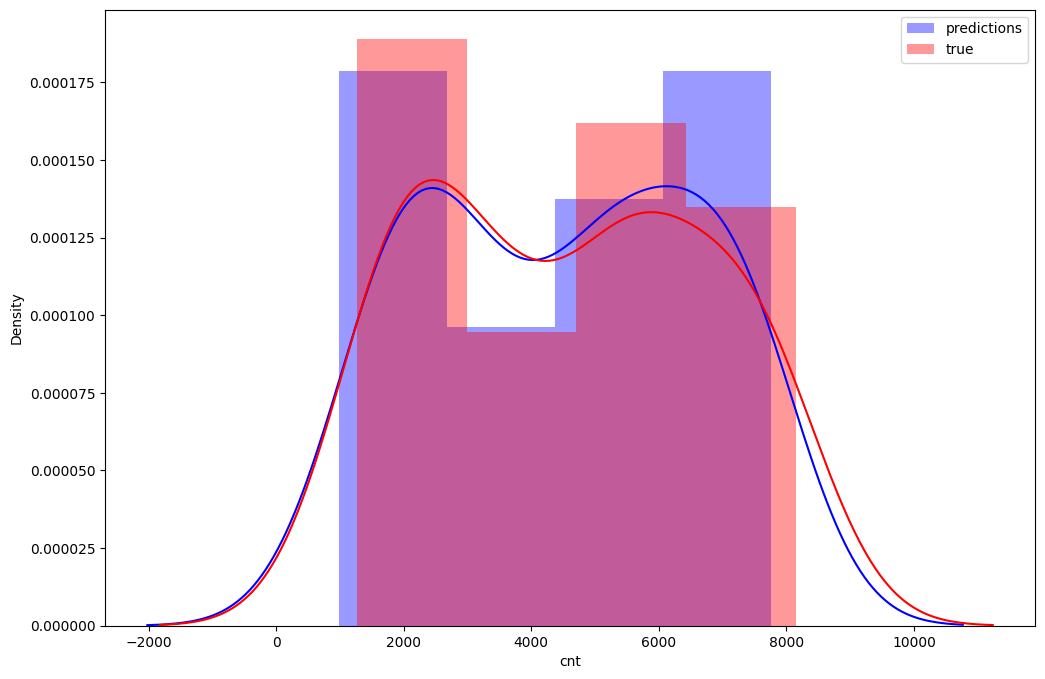

In [116]:
rf = RandomForestRegressor()
run(rf)

Split mode:
MSE: 804485.1156265616 
 R2_SCORE: 0.8264402866315976 
 MAPE: 0.1905402727792992 
 RMSE: 896.9309425070369 

Check for overfitting and underfitting
Training set score: 80.60947591595877
Test set score: 82.64402866315976


C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, ax=ax, color="blue", label="predictions", bins=bins)
C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

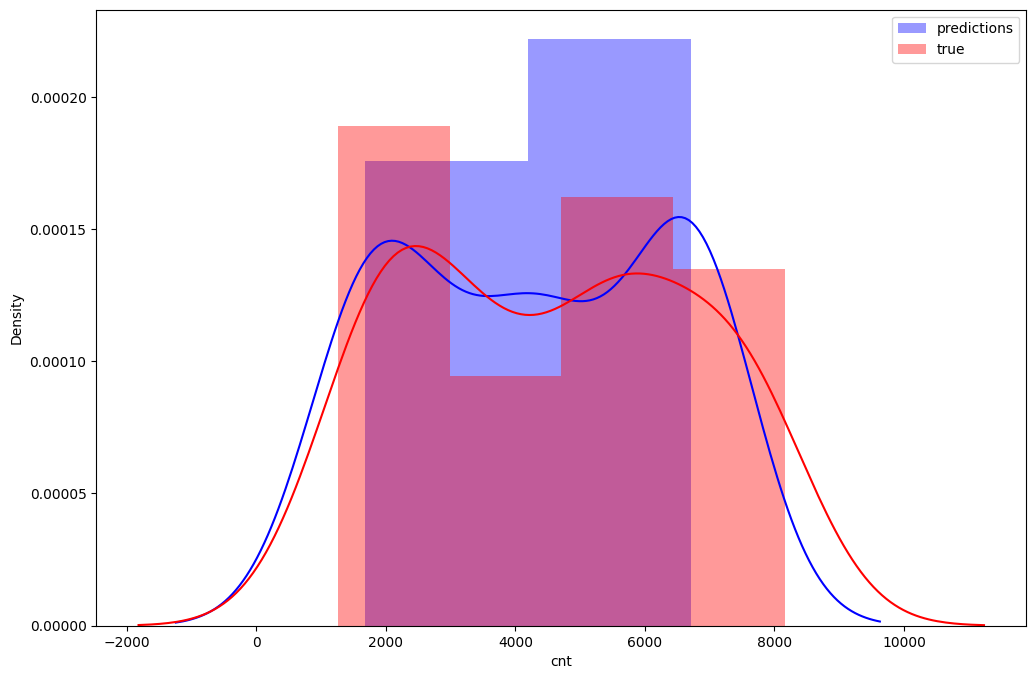

In [117]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)
run(dtr)

Split mode:
MSE: 605791.5218604652 
 R2_SCORE: 0.869306465896236 
 MAPE: 0.14798607282055157 
 RMSE: 778.3261025177462 

Check for overfitting and underfitting
Training set score: 86.62654346598954
Test set score: 86.93064658962359


C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, ax=ax, color="blue", label="predictions", bins=bins)
C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

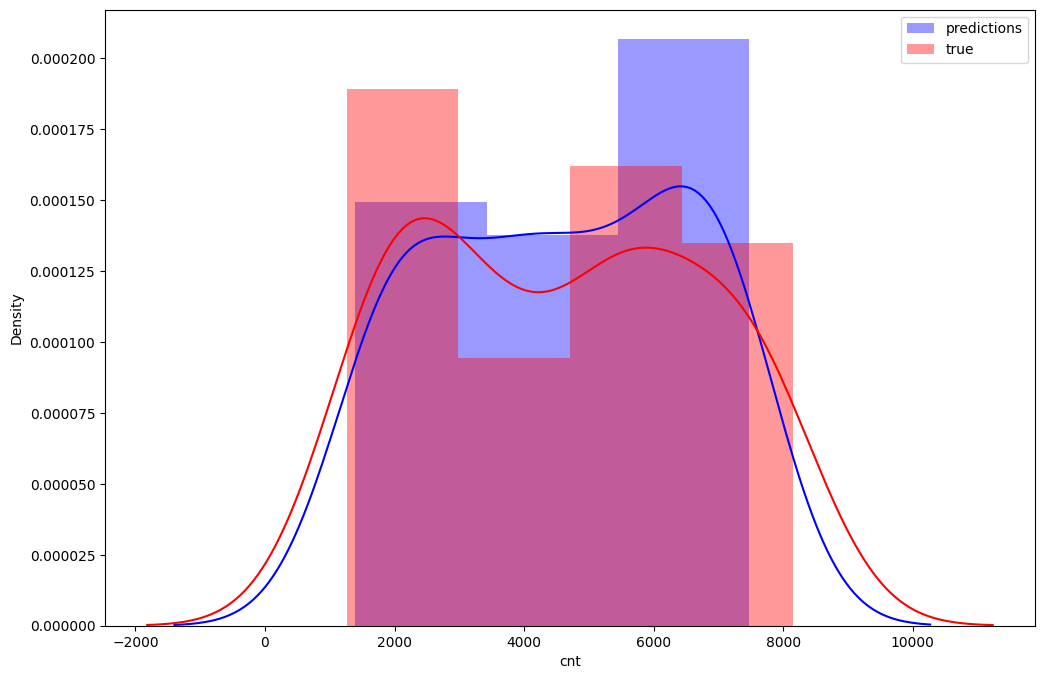

In [118]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
run(knn)

In [110]:
from sklearn.ensemble import VotingRegressor

Split mode:
MSE: 476619.12901421677 
 R2_SCORE: 0.8971741331060198 
 MAPE: 0.12233298046047575 
 RMSE: 690.376077956223 

Check for overfitting and underfitting
Training set score: 88.41701334696475
Test set score: 89.71741331060198


C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, ax=ax, color="blue", label="predictions", bins=bins)
C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_99620\2905417089.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

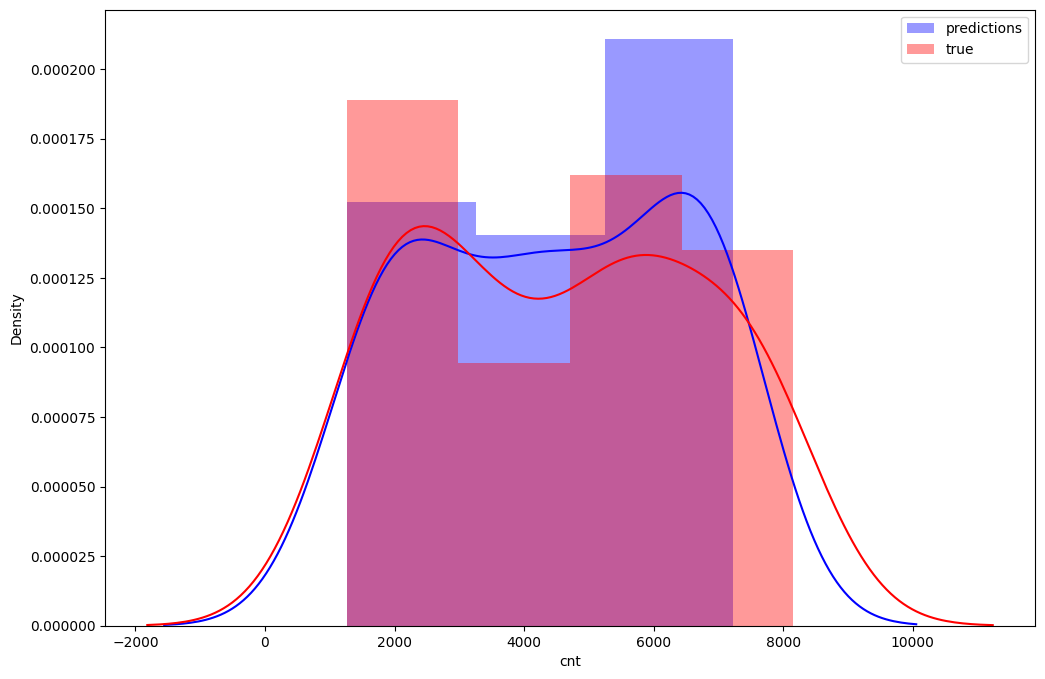

In [119]:
er = VotingRegressor([('lr', lr), ('dtr', dtr), ('knn', knn)])
run(er)